Acces Dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "tsamarahanifa" 
os.environ['KAGGLE_KEY'] = "ec93d0f77352bad0ead5bf45e6df4a3b" 
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:01<00:00, 92.8MB/s]
100% 163M/163M [00:01<00:00, 96.4MB/s]


Extract ZIp File

In [ ]:
import zipfile
local_zip = '/content/face-mask-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/data')

['without_mask', 'with_mask']

Inisialisasi Direktori Utama

In [ ]:
base_dir = '/tmp/data'
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir)

Inisialisasi Liblary

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Split Dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

Found 7553 images belonging to 2 classes.
Found 7553 images belonging to 2 classes.


Membangun Arsitektur CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Kesimpulan dari model arsitektur 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Training Dataset

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,  
      verbose=2)

Epoch 1/20
25/25 - 40s - loss: 0.7177 - accuracy: 0.5813 - val_loss: 0.4852 - val_accuracy: 0.8438
Epoch 2/20
25/25 - 38s - loss: 0.4241 - accuracy: 0.8275 - val_loss: 0.3600 - val_accuracy: 0.8938
Epoch 3/20
25/25 - 38s - loss: 0.3360 - accuracy: 0.8600 - val_loss: 0.3414 - val_accuracy: 0.8375
Epoch 4/20
25/25 - 38s - loss: 0.2851 - accuracy: 0.8800 - val_loss: 0.2963 - val_accuracy: 0.8813
Epoch 5/20
25/25 - 38s - loss: 0.2600 - accuracy: 0.8950 - val_loss: 0.2859 - val_accuracy: 0.8625
Epoch 6/20
25/25 - 38s - loss: 0.2559 - accuracy: 0.8863 - val_loss: 0.1958 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 38s - loss: 0.2377 - accuracy: 0.9112 - val_loss: 0.2021 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 38s - loss: 0.2102 - accuracy: 0.9162 - val_loss: 0.2190 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 38s - loss: 0.2245 - accuracy: 0.9087 - val_loss: 0.1387 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 38s - loss: 0.1813 - accuracy: 0.9375 - val_loss: 0.2250 - val_accuracy: 0.9125
Epoch 11/

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


25/25 - 37s - loss: 0.2556 - accuracy: 0.8960 - val_loss: 0.2769 - val_accuracy: 0.9000
Epoch 12/20
25/25 - 38s - loss: 0.2348 - accuracy: 0.9112 - val_loss: 0.2325 - val_accuracy: 0.8938
Epoch 13/20
25/25 - 38s - loss: 0.2207 - accuracy: 0.9175 - val_loss: 0.2484 - val_accuracy: 0.9187
Epoch 14/20
25/25 - 38s - loss: 0.2268 - accuracy: 0.9200 - val_loss: 0.1861 - val_accuracy: 0.9250
Epoch 15/20
25/25 - 38s - loss: 0.1684 - accuracy: 0.9375 - val_loss: 0.1566 - val_accuracy: 0.9625
Epoch 16/20
25/25 - 38s - loss: 0.1576 - accuracy: 0.9463 - val_loss: 0.1484 - val_accuracy: 0.9125
Epoch 17/20
25/25 - 38s - loss: 0.1835 - accuracy: 0.9287 - val_loss: 0.1472 - val_accuracy: 0.9438
Epoch 18/20
25/25 - 38s - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.1540 - val_accuracy: 0.9250
Epoch 19/20
25/25 - 38s - loss: 0.1661 - accuracy: 0.9413 - val_loss: 0.2075 - val_accuracy: 0.9125
Epoch 20/20
25/25 - 38s - loss: 0.1845 - accuracy: 0.9262 - val_loss: 0.2069 - val_accuracy: 0.9500


Untuk Testing Dataset

Saving testai.jpg to testai.jpg
testai.jpg
[[0.]]
mask


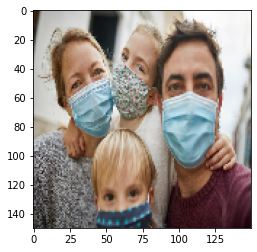

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  

  print(fn)
  print(classes)
  if classes==0:
    print('mask')
  else:
    print('no mask')

Saving aitest3.jpeg to aitest3.jpeg
aitest3.jpeg
[[6.270121e-09]]
no mask


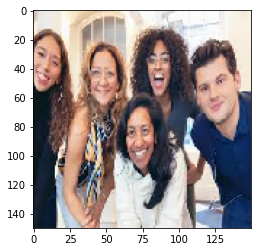

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  

  print(fn)
  print(classes)
  if classes==0:
    print('mask')
  else:
    print('no mask')